In [1]:
import numpy as np
import os
from datasets.bvh_parser import BVH_file
import torch
from models.Kinematics import ForwardKinematics

In [8]:
npy_list = os.listdir("Mixamo")
# Aj = np.load('Mixamo/Aj.npy', allow_pickle = True)
print(npy_list)
count = 0
for character in npy_list:
    if ".npy" in character:
        mouvement_all = np.load(os.path.join("Mixamo", character), allow_pickle = True)
        print(mouvement_all[0].shape[1], character, len(mouvement_all))
        count +=len(mouvement_all)
print(count)

['Abe_m.npy', 'Aj.npy', 'BigVegas.npy', 'Claire.npy', 'James_m.npy', 'Jasper_m.npy', 'Joe_m.npy', 'Kaya.npy', 'Knight_m.npy', 'Liam_m.npy', 'LolaB_m.npy', 'Malcolm_m.npy', 'Maria_m.npy', 'mean_var', 'Michelle_m.npy', 'Olivia_m.npy', 'Ortiz_m.npy', 'Paladin_m.npy', 'ParasiteLStarkie_m.npy', 'Pearl_m.npy', 'Pumpkinhulk_m.npy', 'Racer_m.npy', 'Remy_m.npy', 'SportyGranny.npy', 'std_bvhs', 'test_list.txt', 'Timmy_m.npy', 'train_list.txt', 'Yaku_m.npy']
84 Abe_m.npy 44
69 Aj.npy 244
69 BigVegas.npy 243
69 Claire.npy 244
84 James_m.npy 45
84 Jasper_m.npy 48
84 Joe_m.npy 45
69 Kaya.npy 244
84 Knight_m.npy 48
84 Liam_m.npy 48
84 LolaB_m.npy 47
84 Malcolm_m.npy 48
84 Maria_m.npy 48
84 Michelle_m.npy 48
84 Olivia_m.npy 42
84 Ortiz_m.npy 46
84 Paladin_m.npy 47
84 ParasiteLStarkie_m.npy 48
84 Pearl_m.npy 48
84 Pumpkinhulk_m.npy 47
84 Racer_m.npy 45
84 Remy_m.npy 48
69 SportyGranny.npy 242
84 Timmy_m.npy 44
84 Yaku_m.npy 47
2148


In [5]:
corps_name_mixamo2_m = ['Hips', 'LeftUpLeg', 'LeftLeg', 'LeftFoot', 'LeftToeBase', 'LeftToe_End', 
                        'RightUpLeg', 'RightLeg', 'RightFoot', 'RightToeBase', 'RightToe_End', 
                        'Spine', 'Spine1', 'Spine1_split', 'Spine2', 'Neck', 'Head', 
                        'HeadTop_End', 'LeftShoulder', 'LeftShoulder_split', 'LeftArm', 'LeftForeArm', 'LeftHand', 'RightShoulder', 'RightShoulder_split', 'RightArm', 'RightForeArm', 'RightHand']
corps_name_1 = ['Pelvis', 'LeftUpLeg', 'LeftLeg', 'LeftFoot', 'LeftToeBase', 
                'RightUpLeg', 'RightLeg', 'RightFoot', 'RightToeBase', 
                'Hips', 'Spine', 'Spine1', 'Spine2', 'Neck', 'Head', 'LeftShoulder', 'LeftArm', 'LeftForeArm', 'LeftHand', 'RightShoulder', 'RightArm', 'RightForeArm', 'RightHand']
print(len(corps_name_mixamo2_m))
print(len(corps_name_1))

28
23


In [24]:
abvh = BVH_file("Aj.bvh")
print(abvh.topology)
print(abvh.skeleton_type)
abvh.write("ignore.bvh")
print(abvh.anim.rotations[0,abvh.corps,:])

file path:Aj.bvh, skeleton type: 0
(0, 0, 1, 2, 3, 0, 5, 6, 7, 0, 9, 10, 11, 12, 13, 12, 15, 16, 17, 12, 19, 20, 21)
0
[[-1.9801004e+01 -8.2304784e+01 -2.1016957e+01]
 [-1.7820706e+01  1.4832582e+01  9.6036470e+00]
 [ 2.8144104e+01 -2.9956560e+00  5.0791050e+00]
 [-8.8265640e+00  1.2097090e+00 -7.1551740e+00]
 [ 0.0000000e+00  2.0000000e-06  0.0000000e+00]
 [-1.2955417e+01 -2.3320592e+01 -8.7279740e+00]
 [ 2.3074215e+01  8.7783470e+00 -8.8339400e+00]
 [-8.5745980e+00 -1.3413890e+00  1.1058311e+01]
 [ 0.0000000e+00 -1.0000000e-06 -0.0000000e+00]
 [-0.0000000e+00  0.0000000e+00 -0.0000000e+00]
 [ 2.2709800e+00  1.1504000e-01  7.1421000e-02]
 [ 4.5888510e+00  4.8045000e-02  1.5876490e+00]
 [ 4.5665000e+00  5.8995000e-02  1.6317790e+00]
 [-6.4494500e+00  9.1631340e+00 -4.2289880e+00]
 [ 1.3063320e+00  3.7856665e+01 -3.1278640e+00]
 [-2.3247500e-01  4.6378700e+00 -1.3596740e+00]
 [ 2.5122269e+01 -7.7231237e+01 -4.2206191e+01]
 [-8.0000000e-06 -1.4145783e+01 -1.0000000e-06]
 [-5.1489886e+01 

In [15]:
def forward(rotation: torch.Tensor, position: torch.Tensor, offset: torch.Tensor,topo, order='xyz', quater=False, world=True):
    result = torch.empty(rotation.shape[:-1] + (3, ), device=position.device)
#     norm = torch.norm(rotation, dim=-1, keepdim=True)
    #norm[norm < 1e-10] = 1
#     rotation = rotation / norm
    transform = ForwardKinematics.transform_from_euler(rotation, order)

    offset = offset.reshape((-1, 1, offset.shape[-2], offset.shape[-1], 1))

    result[..., 0, :] = position
#     print(result)
    for i, pi in enumerate(topo):
        if pi == -1:
            assert i == 0
            continue

        transform[..., i, :, :] = torch.matmul(transform[..., pi, :, :].clone(), transform[..., i, :, :].clone()).float()
        offset = offset.float()
#         print(torch.matmul(transform[..., i, :, :], offset[..., i, :, :]))
        result[..., i, :] = torch.matmul(transform[..., i, :, :], offset[..., i, :, :]).squeeze()
        if world: result[..., i, :] += result[..., pi, :]
    return result

In [17]:
concis = BVH_file("ignore.bvh")
positions = torch.tensor(concis.anim.positions[:,0,:])
print(positions)
rotations = torch.tensor(abvh.anim.rotations[:,abvh.corps,:])
# print(rotations.shape)
print("rotations: ",rotations.dtype)
offset = torch.tensor(concis.offset)
# print(offset.dtype)
topo = concis.topology
print(concis.topology)
result = forward(rotations, positions, offset, topo)
print(result.shape)

file path:ignore.bvh, skeleton type: 0
tensor([[-5.8820e-01,  8.0406e+01,  9.3877e-02],
        [-5.9290e-01,  8.0411e+01,  9.0700e-02],
        [-5.9792e-01,  8.0416e+01,  8.7539e-02],
        [-6.0281e-01,  8.0422e+01,  8.4699e-02],
        [-6.0657e-01,  8.0428e+01,  8.2122e-02],
        [-6.0757e-01,  8.0433e+01,  7.8975e-02],
        [-6.0342e-01,  8.0437e+01,  7.3917e-02],
        [-5.9110e-01,  8.0439e+01,  6.5129e-02],
        [-5.6725e-01,  8.0437e+01,  5.0931e-02],
        [-5.2854e-01,  8.0430e+01,  3.0191e-02],
        [-4.7202e-01,  8.0418e+01,  2.6620e-03],
        [-3.9509e-01,  8.0403e+01, -3.1470e-02],
        [-2.9526e-01,  8.0386e+01, -7.2458e-02],
        [-1.7014e-01,  8.0371e+01, -1.2861e-01],
        [-1.7633e-02,  8.0361e+01, -1.9645e-01],
        [ 1.6289e-01,  8.0348e+01, -2.8297e-01],
        [ 3.7050e-01,  8.0327e+01, -3.9430e-01],
        [ 6.1114e-01,  8.0288e+01, -5.3355e-01],
        [ 8.8962e-01,  8.0220e+01, -7.0021e-01],
        [ 1.2024e+00,  8.0118e

In [18]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

def pyplot_skeleton(topology, offsets):
    # Plot a skeleton in 3d
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    total_offsets = torch.zeros_like(offsets)
#     print("total offset: ", total_offsets.shape)
    for j, i in enumerate(topology):
#         print("i: {}, j: {}".format(i, j))
        total_offsets[j] = offsets[j] + total_offsets[i]
        plt.plot(
            np.array(total_offsets[[i,j], 0]), 
            np.array(total_offsets[[i,j], 2]), 
            np.array(total_offsets[[i,j], 1]), 
            color='black'
            )
    set_axes_equal(ax)

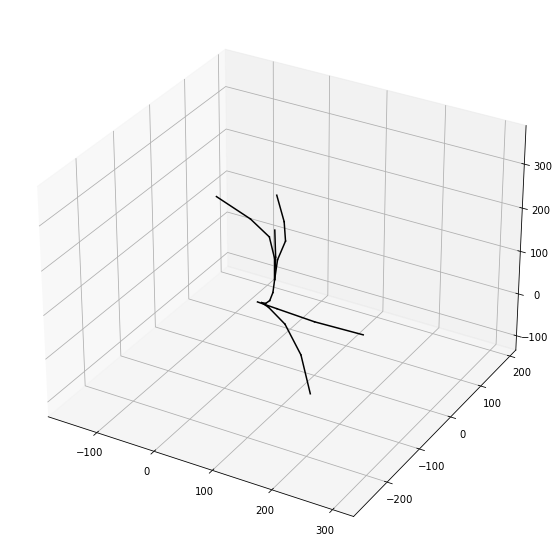

In [19]:
pyplot_skeleton(topo, result[100])
plt.show()

In [20]:
def draw_3Danimation(topology, a_pos, save_path):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    
    def init(topology, offsets):
        lines = []
        total_offsets = np.zeros_like(offsets)
        for j, i in enumerate(topology):
    #         print("i: {}, j: {}".format(i, j))
            total_offsets[j] = offsets[j] + total_offsets[i]
            stick_line = ax.plot(total_offsets[[i,j], 0], total_offsets[[i,j], 2], 
                total_offsets[[i,j], 1])[0]
            stick_line._verts3d = total_offsets[[i,j], 0], total_offsets[[i,j], 2], total_offsets[[i,j], 1]
            lines.append(stick_line)
        return lines

    def draw_animation_skeleton(i, topology, all_offsets, lines):
        # Plot a skeleton in 3d
        offsets = all_offsets[i]
        total_offsets = np.zeros_like(offsets)
    #     print("total offset: ", total_offsets.shape)
        for j, i in enumerate(topology):
    #         print("i: {}, j: {}".format(i, j))
            total_offsets[j] = offsets[j] + total_offsets[i]
            lines[j]._verts3d = total_offsets[[i,j], 0], total_offsets[[i,j], 2], total_offsets[[i,j], 1]
        set_axes_equal(ax)
        return lines
    
#     poppy_topology = dataset.joint_topologies[0]
    lines = init(topology, a_pos[0])
    total_len = a_pos.shape[0]
    # poppy_lines
    anim = animation.FuncAnimation(fig = fig, func = draw_animation_skeleton, 
                                   frames = total_len, fargs = (topology, a_pos, lines), blit = True)
    anim.save(save_path,fps = 6)


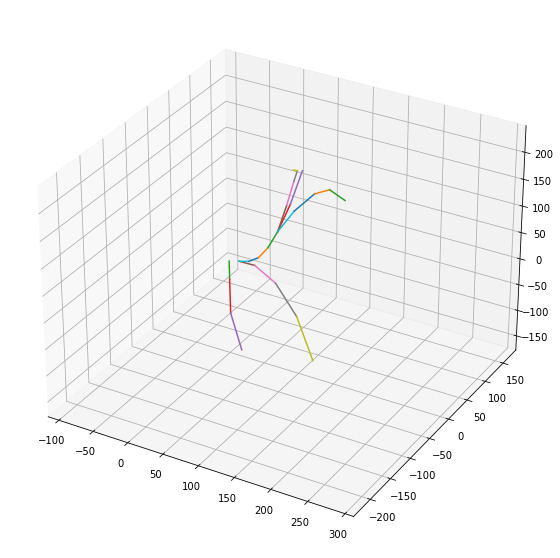

In [21]:
# result = result.numpy()
draw_3Danimation(topo, result, "try.gif")